In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\moham\Documents\naresh it\data files\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat_column=[i for i,j in dict(visa_df.dtypes).items() if j=='object']
num_column=[i for i,j in dict(visa_df.dtypes).items() if j!='object']

In [4]:
cat_column

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

# in this method we study about the how many members are certified are not #

In [5]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [8]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df['case_status'].value_counts().keys()

Index(['Certified', 'Denied'], dtype='object', name='case_status')

In [15]:
continents=visa_df['continent'].value_counts().keys()
certified_list=[]
for i in continents:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1&con2
    count=len(visa_df[con3])
    print(f"{i}:  {count}")
    certified_list.append(count)

Asia:  11012
Europe:  2957
North America:  2037
South America:  493
Africa:  397
Oceania:  122


In [21]:
continentss=visa_df['continent'].unique()
certified_lis=[]
denied_list=[]
for i in continentss:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    con4=con1&con2
    con5=con1&con3
    count_cer=len(visa_df[con4])
    count_den=len(visa_df[con5])
    print(f"the list of certifed {i}:{count_cer}")
    print(f"the list of denied {i} : {count_den}")
    certified_lis.append(count_cer)
    denied_list.append(count_den)

the list of certifed Asia:11012
the list of denied Asia : 5849
the list of certifed Africa:397
the list of denied Africa : 154
the list of certifed North America:2037
the list of denied North America : 1255
the list of certifed Europe:2957
the list of denied Europe : 775
the list of certifed South America:493
the list of denied South America : 359
the list of certifed Oceania:122
the list of denied Oceania : 70


In [17]:
pd.DataFrame(zip(continents,certified_list),columns=['continents','certified'])

,continents,certified
0,Asia,11012
1,Europe,2957
2,North America,2037
3,South America,493
4,Africa,397
5,Oceania,122


In [22]:
pd.DataFrame(zip(continentss,denied_list),columns=['continents','denied'])

,continents,denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [23]:
col=['certified','denied']
df=pd.DataFrame(zip(certified_list,denied_list),index=continentss,columns=col)

In [24]:
df

,certified,denied
Asia,11012,5849
Africa,2957,154
North America,2037,1255
Europe,493,775
South America,397,359
Oceania,122,70


In [26]:
id_column=visa_df['continent']
data_column=visa_df['case_status']
df1=pd.crosstab(id_column,data_column)
df1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

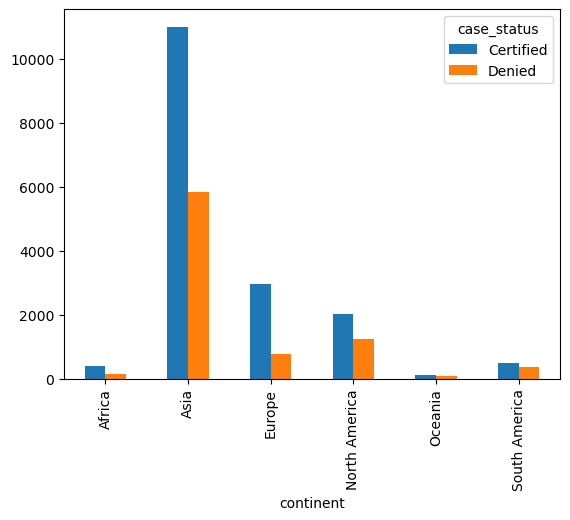

In [29]:
df1.plot(kind='bar')

<Axes: >

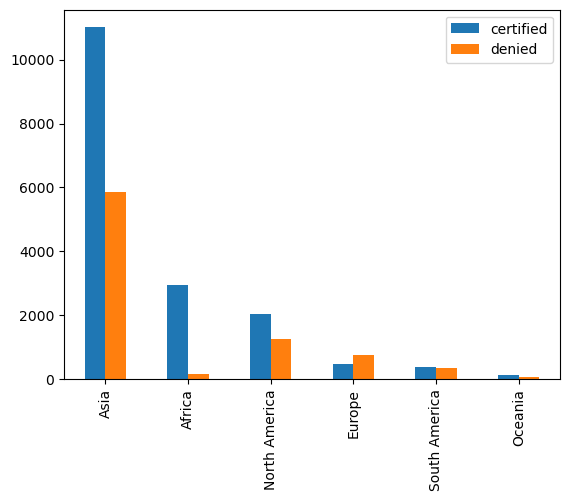

In [31]:
df.plot(kind='bar')

In [33]:
id=column=visa_df['continent']
data_column=[visa_df['education_of_employee'],
             visa_df['case_status']]
df8=pd.crosstab(id_column,data_column)
df8

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

<Figure size 1000x800 with 0 Axes>

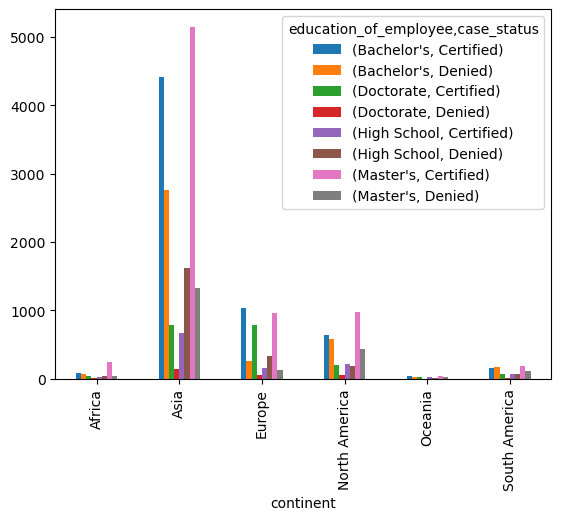

In [36]:
plt.figure(figsize=(10,8))
df8.plot(kind='bar')

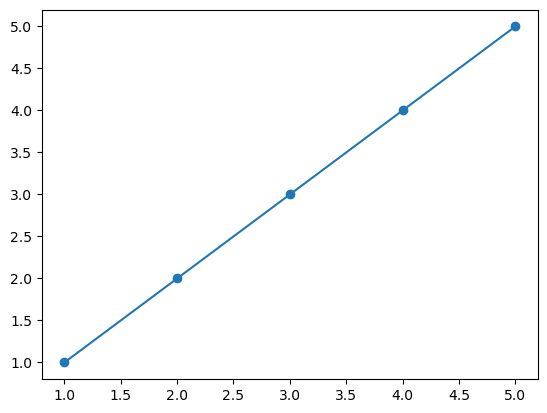

In [38]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

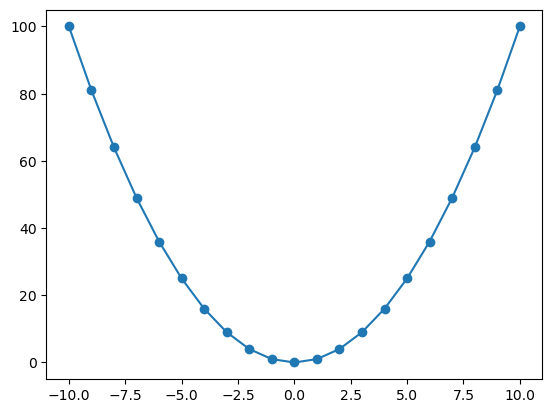

In [39]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [42]:
pd.DataFrame(zip(x,y))

,0,1
0,-10,100
1,-9,81
2,-8,64
3,-7,49
4,-6,36
5,-5,25
6,-4,16
7,-3,9
8,-2,4
9,-1,1


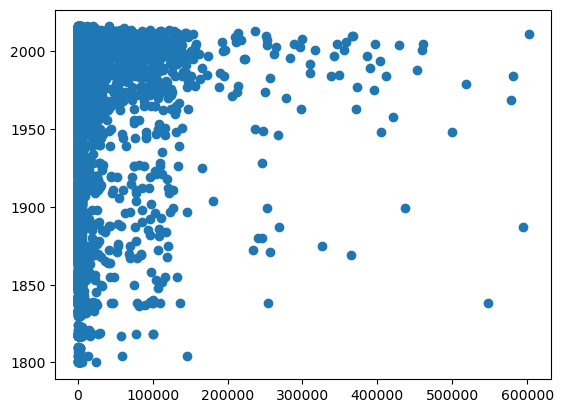

In [46]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

Text(0, 0.5, 'yr_of_estab')

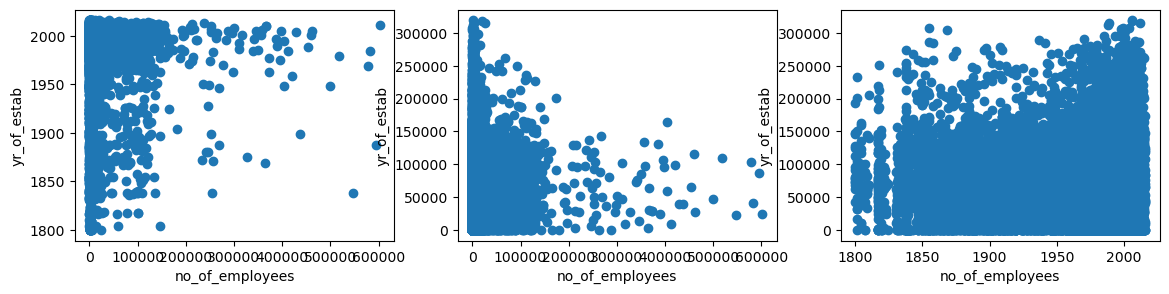

In [61]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))

plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')